# 1. Libraries and settings

In [1]:
import pandas as pd
import numpy as np
import math
import sklearn
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils


#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

D:\Value of Dream\108-1 深度學習\Deep Learning Tool\LSTM\NYSE Stock: ['Categorical Dependent Variable', 'Continuous Dependent Variable']
D:\Value of Dream\108-1 深度學習\Deep Learning Tool\LSTM\NYSE Stock\Categorical Dependent Variable: ['.ipynb_checkpoints', 'LSTM for categorical y.ipynb', 'LSTM for categorical y.pdf']


Using TensorFlow backend.


# 2. Analyze Data

In [2]:
df = pd.read_csv("D:/Value of Dream/108-1 深度學習/Deep Learning Tool/Data/prices-split-adjusted.csv", index_col = 0)
print(df.info())
print(df.head())
print(df.values.shape)
# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB
None
           symbol        open       close         low        high     volume
date                                                                        
2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0
2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998  2489500.0
2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002  2006300.0
2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002  1408600.0
(851264, 6)

number of different stocks:  501
['COST', 'NKE', 'MAA', 'EVHC', 'UAA'

In [3]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [4]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


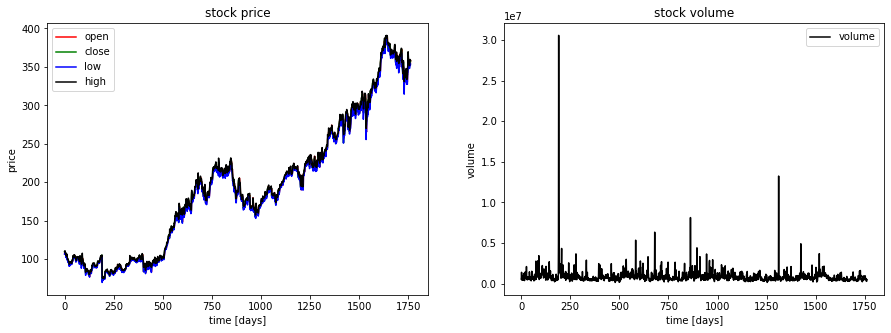

In [5]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

# 3. Manipulate data 
- choose a specific stock
- drop feature: volume
- normalize stock data
- create train and test data sets

In [6]:
def feature_normalize(train):
    train_norm = train.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))  #標準化(介於0~1之間)
    return train_norm

In [7]:
## 很重要  切割視窗
def create_segments_and_labels(df, time_steps, step):#, label_name):
    """
    This function receives a dataframe and returns the reshaped segments
    of x,y,z acceleration as well as the corresponding labels
    Args:
        df: Dataframe in the expected format
        time_steps: Integer value of the length of a segment that is created
    Returns:
        reshaped_segments
        labels:
    """

#feature 有四個
    N_FEATURES = 4
#選擇測試切出20%
    test_set_size_percentage = 20
    segments = []
    labels = []
    
#     data_raw = df.as_matrix()
#創造時間窗，將所有選擇特徵一起切割視窗
    for i in range(0, len(df) - time_steps, step):#
        segments.append(df.values[i: i + time_steps])
#以當期四種特徵預測下一期收盤價
        rate = (df.open.values[i + time_steps]-df.open.values[i + time_steps-1])/df.open.values[i + time_steps-1]
        temp = rate
        if temp < 0:
            if temp <= -0.2:
                label =0
            elif temp <= -0.1:
                label =1
            elif temp < 0:
                label =2
        else:
            if temp == 0:
                label =3
            elif temp <= 0.1:
                label =4
            elif temp <= 0.2:
                label =5                
            elif temp >0.2:
                label =6              
        labels.append([label])
    test_set_size = np.round(test_set_size_percentage/100*np.asarray(segments).shape[0])
    train_set_size = int(np.asarray(segments).shape[0] - (test_set_size));  
    print(train_set_size)
#     segments = np.array(segments);
    reshaped_segments_train = np.asarray(segments[:train_set_size], dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    reshaped_segments_test = np.asarray(segments[train_set_size:], dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels_train = np.asarray(labels[:train_set_size])
    labels_test = np.asarray(labels[train_set_size:])
#以訓練資料占比分割訓練測試集，並以視窗最後一筆資料當作預測值
#     x_train = segments[:train_set_size,:,:]#(1394, 19, 4)
#     y_train = lables[:train_set_size,-1,:]#(1394, 4)
#     x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
#     y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
#     x_test = segments[train_set_size:,:-1,:]
#     y_test = segments[train_set_size:,-1,:]    
    return reshaped_segments_train, labels_train, reshaped_segments_test,labels_test
#     return [x_train, y_train, x_valid, y_valid, x_test, y_test]


In [8]:
# choose one stock & drop volume
df_stock = df[df.symbol == 'EQIX'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = feature_normalize(df_stock_norm)

# create train, test data
time_steps = 20 # choose sequence length
step = 5
x_train, y_train, x_test, y_test = create_segments_and_labels(df_stock_norm, time_steps, step)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ', y_test.shape)
num_classes = 7
y_train_oneshot = np_utils.to_categorical(y_train, num_classes)
print(f"y_train_oneshot:{y_train_oneshot.shape}")
y_test_oneshot = np_utils.to_categorical(y_test, num_classes)
print(f"y_test_oneshot:{y_test_oneshot.shape}")

df_stock.columns.values =  ['open', 'close', 'low', 'high']
279
x_train.shape =  (279, 20, 4)
y_train.shape =  (279, 1)
x_test.shape =  (70, 20, 4)
y_test.shape =  (70, 1)
y_train_oneshot:(279, 7)
y_test_oneshot:(70, 7)


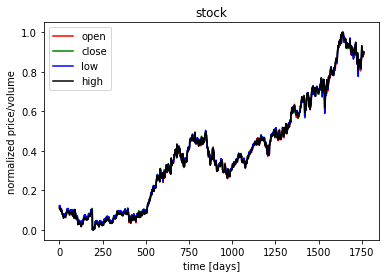

In [9]:
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='close')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [10]:
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
input_shape = (num_time_periods*num_sensors)   ## 80*3  每一筆資料 80(時間窗) 3個變數( xyz) 
x_train_reshape = x_train.reshape(x_train.shape[0], input_shape).astype('float32')
print(f"x_train_reshape.shape:{x_train_reshape.shape}")
x_test_reshape = x_test.reshape(x_test.shape[0], input_shape).astype('float32')
print(f"x_test_reshape.shape:{x_test_reshape.shape}")

x_train_reshape.shape:(279, 80)
x_test_reshape.shape:(70, 80)


# LSTM

In [11]:
#一對一模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers import SimpleRNN, Activation, Dense, RNN
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import ReduceLROnPlateau

In [12]:
learning_rate_function = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, #準確率重複3次就要減少
                                            verbose=1, 
                                            factor=0.5, #準確率乘上factor設成下一個learning_rate
                                            min_lr=0.00001) 


In [13]:
model_lstm = Sequential()
##  SimpleRNN  注意他的 input 格式!!(先變成三維，把第二維、三維放在這邊)
# model_lstm.add(SimpleRNN(units=128, input_shape=(x_train.shape[1], x_train.shape[2])))
model_lstm.add(LSTM(128, input_length= x_train.shape[1], input_dim= x_train.shape[2],return_sequences=False))

#return_sequences=True ,多加一層隱藏層
# model_lstm.add(LSTM(128, input_length= x_train.shape[1], input_dim= x_train.shape[2],return_sequences=True))
# model.add(LSTM(32))

#units隱藏層神經元個數
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(64, activation = 'relu'))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(16, activation = 'relu'))#三層隱藏層
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(num_classes, activation='softmax'))
#num_classes不能改
model_lstm.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

print("\n--- Fit the model ---\n")

train_history = model_lstm.fit(x=x_train, y= y_train_oneshot, validation_split=0.1, epochs=550, batch_size=10,callbacks=[learning_rate_function],verbose=2)#callbacks=[learning_rate_function], verbose=2)


print("\n--- Learning curve of model training ---\n")

get_ipython().magic('matplotlib inline')
## IPython有一組預先定義好的所謂的魔法函數（Magic Functions），你可以通過命令列的語法形式來訪問它們。


Instructions for updating:
Colocations handled automatically by placer.


d:\programfiles\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
d:\programfiles\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, return_sequences=False, input_shape=(20, 4))`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               68096     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
___________________________

Epoch 69/550
 - 0s - loss: 0.9625 - acc: 0.5060 - val_loss: 0.7087 - val_acc: 0.3929
Epoch 70/550
 - 0s - loss: 0.9700 - acc: 0.4980 - val_loss: 0.7080 - val_acc: 0.3929
Epoch 71/550
 - 0s - loss: 0.9732 - acc: 0.5100 - val_loss: 0.7086 - val_acc: 0.3929
Epoch 72/550
 - 0s - loss: 0.9945 - acc: 0.4741 - val_loss: 0.7088 - val_acc: 0.3929
Epoch 73/550
 - 0s - loss: 0.9783 - acc: 0.4502 - val_loss: 0.7089 - val_acc: 0.3929
Epoch 74/550
 - 0s - loss: 1.0018 - acc: 0.4781 - val_loss: 0.7083 - val_acc: 0.3929
Epoch 75/550
 - 0s - loss: 0.9713 - acc: 0.4940 - val_loss: 0.7088 - val_acc: 0.3929
Epoch 76/550
 - 0s - loss: 1.0144 - acc: 0.4622 - val_loss: 0.7091 - val_acc: 0.3929
Epoch 77/550
 - 0s - loss: 0.9859 - acc: 0.4821 - val_loss: 0.7081 - val_acc: 0.3929
Epoch 78/550
 - 0s - loss: 1.0022 - acc: 0.4582 - val_loss: 0.7086 - val_acc: 0.3929
Epoch 79/550
 - 0s - loss: 0.9948 - acc: 0.4940 - val_loss: 0.7081 - val_acc: 0.3929
Epoch 80/550
 - 0s - loss: 0.9892 - acc: 0.5060 - val_loss: 0.708

Epoch 165/550
 - 0s - loss: 0.9798 - acc: 0.4980 - val_loss: 0.7109 - val_acc: 0.3929
Epoch 166/550
 - 0s - loss: 0.9726 - acc: 0.5339 - val_loss: 0.7115 - val_acc: 0.3929
Epoch 167/550
 - 0s - loss: 0.9772 - acc: 0.5139 - val_loss: 0.7116 - val_acc: 0.3929
Epoch 168/550
 - 0s - loss: 0.9859 - acc: 0.4980 - val_loss: 0.7125 - val_acc: 0.3929
Epoch 169/550
 - 0s - loss: 0.9991 - acc: 0.4542 - val_loss: 0.7124 - val_acc: 0.3929
Epoch 170/550
 - 0s - loss: 0.9560 - acc: 0.5179 - val_loss: 0.7132 - val_acc: 0.3929
Epoch 171/550
 - 0s - loss: 1.0018 - acc: 0.4303 - val_loss: 0.7134 - val_acc: 0.3929
Epoch 172/550
 - 0s - loss: 1.0114 - acc: 0.4701 - val_loss: 0.7135 - val_acc: 0.3929
Epoch 173/550
 - 0s - loss: 0.9966 - acc: 0.4661 - val_loss: 0.7134 - val_acc: 0.3929
Epoch 174/550
 - 0s - loss: 0.9691 - acc: 0.4861 - val_loss: 0.7135 - val_acc: 0.3929
Epoch 175/550
 - 0s - loss: 0.9981 - acc: 0.4861 - val_loss: 0.7138 - val_acc: 0.3929
Epoch 176/550
 - 0s - loss: 0.9821 - acc: 0.4582 - val

Epoch 261/550
 - 0s - loss: 0.9830 - acc: 0.4661 - val_loss: 0.7113 - val_acc: 0.3929
Epoch 262/550
 - 0s - loss: 0.9982 - acc: 0.4781 - val_loss: 0.7118 - val_acc: 0.3929
Epoch 263/550
 - 0s - loss: 0.9986 - acc: 0.4661 - val_loss: 0.7118 - val_acc: 0.3929
Epoch 264/550
 - 0s - loss: 1.0056 - acc: 0.4661 - val_loss: 0.7115 - val_acc: 0.3929
Epoch 265/550
 - 0s - loss: 0.9977 - acc: 0.4382 - val_loss: 0.7114 - val_acc: 0.3929
Epoch 266/550
 - 0s - loss: 0.9580 - acc: 0.5378 - val_loss: 0.7105 - val_acc: 0.3929
Epoch 267/550
 - 0s - loss: 0.9651 - acc: 0.5139 - val_loss: 0.7109 - val_acc: 0.3929
Epoch 268/550
 - 0s - loss: 0.9850 - acc: 0.4940 - val_loss: 0.7123 - val_acc: 0.3929
Epoch 269/550
 - 0s - loss: 0.9603 - acc: 0.4462 - val_loss: 0.7131 - val_acc: 0.3929
Epoch 270/550
 - 0s - loss: 0.9785 - acc: 0.4900 - val_loss: 0.7133 - val_acc: 0.3929
Epoch 271/550
 - 0s - loss: 0.9792 - acc: 0.5139 - val_loss: 0.7132 - val_acc: 0.3929
Epoch 272/550
 - 0s - loss: 0.9884 - acc: 0.4741 - val

Epoch 357/550
 - 0s - loss: 0.9805 - acc: 0.5060 - val_loss: 0.7171 - val_acc: 0.3929
Epoch 358/550
 - 0s - loss: 0.9599 - acc: 0.4940 - val_loss: 0.7173 - val_acc: 0.3929
Epoch 359/550
 - 0s - loss: 0.9597 - acc: 0.5020 - val_loss: 0.7168 - val_acc: 0.3929
Epoch 360/550
 - 0s - loss: 0.9814 - acc: 0.5458 - val_loss: 0.7174 - val_acc: 0.3929
Epoch 361/550
 - 0s - loss: 0.9921 - acc: 0.4701 - val_loss: 0.7167 - val_acc: 0.3929
Epoch 362/550
 - 0s - loss: 0.9959 - acc: 0.4622 - val_loss: 0.7154 - val_acc: 0.3929
Epoch 363/550
 - 0s - loss: 0.9694 - acc: 0.4821 - val_loss: 0.7151 - val_acc: 0.3929
Epoch 364/550
 - 0s - loss: 0.9667 - acc: 0.4900 - val_loss: 0.7152 - val_acc: 0.3929
Epoch 365/550
 - 0s - loss: 0.9575 - acc: 0.5259 - val_loss: 0.7154 - val_acc: 0.3929
Epoch 366/550
 - 0s - loss: 0.9972 - acc: 0.4980 - val_loss: 0.7174 - val_acc: 0.3929
Epoch 367/550
 - 0s - loss: 0.9914 - acc: 0.4542 - val_loss: 0.7178 - val_acc: 0.3929
Epoch 368/550
 - 0s - loss: 0.9551 - acc: 0.5139 - val

Epoch 453/550
 - 0s - loss: 0.9696 - acc: 0.5100 - val_loss: 0.7225 - val_acc: 0.3929
Epoch 454/550
 - 0s - loss: 0.9790 - acc: 0.4900 - val_loss: 0.7235 - val_acc: 0.3929
Epoch 455/550
 - 0s - loss: 0.9747 - acc: 0.4900 - val_loss: 0.7229 - val_acc: 0.3929
Epoch 456/550
 - 0s - loss: 0.9726 - acc: 0.4741 - val_loss: 0.7241 - val_acc: 0.3929
Epoch 457/550
 - 0s - loss: 0.9581 - acc: 0.5299 - val_loss: 0.7245 - val_acc: 0.3929
Epoch 458/550
 - 0s - loss: 0.9665 - acc: 0.4940 - val_loss: 0.7245 - val_acc: 0.3929
Epoch 459/550
 - 0s - loss: 0.9901 - acc: 0.5139 - val_loss: 0.7241 - val_acc: 0.3929
Epoch 460/550
 - 0s - loss: 0.9415 - acc: 0.5259 - val_loss: 0.7255 - val_acc: 0.3929
Epoch 461/550
 - 0s - loss: 0.9967 - acc: 0.4781 - val_loss: 0.7259 - val_acc: 0.3929
Epoch 462/550
 - 0s - loss: 0.9497 - acc: 0.5219 - val_loss: 0.7247 - val_acc: 0.3929
Epoch 463/550
 - 0s - loss: 0.9782 - acc: 0.4980 - val_loss: 0.7251 - val_acc: 0.3929
Epoch 464/550
 - 0s - loss: 0.9822 - acc: 0.4701 - val

Epoch 549/550
 - 0s - loss: 0.9427 - acc: 0.5578 - val_loss: 0.7261 - val_acc: 0.3929
Epoch 550/550
 - 0s - loss: 0.9813 - acc: 0.4622 - val_loss: 0.7249 - val_acc: 0.3929

--- Learning curve of model training ---



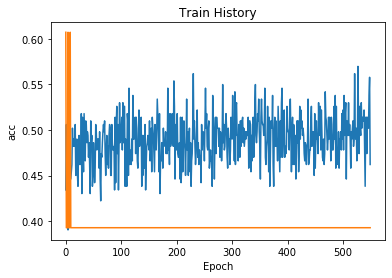

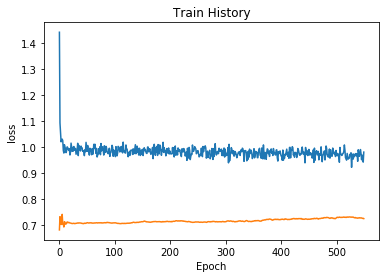

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

show_train_history(train_history, "acc", "val_acc") ## 訓練正確率圖

show_train_history(train_history, "loss", "val_loss") ## 訓練誤差圖


In [15]:
scorelstm = model_lstm.evaluate(x_test, y_test_oneshot, verbose=1)


print("\nAccuracy on test data: %0.2f" % scorelstm[1])
print("\nLoss on test data: %0.2f" % scorelstm[0])
scorelstm

70/70 [==============================] - 0s 142us/step

Accuracy on test data: 0.40

Loss on test data: 0.73


[0.7310706087521144, 0.40000000085149495]

In [16]:
def show_confusion_matrix(validations, predictions):
    LABELS = 7
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, cmap="coolwarm",linecolor='white', linewidths=1, xticklabels='auto', yticklabels='auto', annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

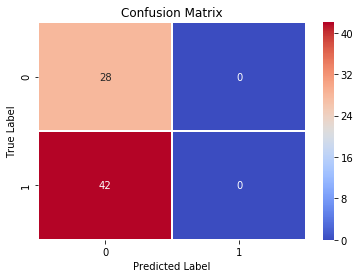


--- Classification report for test data ---

              precision    recall  f1-score   support

           2       0.40      1.00      0.57        28
           4       0.00      0.00      0.00        42

    accuracy                           0.40        70
   macro avg       0.20      0.50      0.29        70
weighted avg       0.16      0.40      0.23        70



d:\programfiles\python37\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
y_pred_test = model_lstm.predict(x_test)

max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_oneshot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

# %%

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test))
